In [104]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import sys

In [105]:
folder = 'GA_results'
results1_6_path = '2023-03-24_14-25-41_best_score_50_100_seed_2023_no_duplicates_rank_amax1_6_lig_v4.csv'
results1_0 = '2023-03-24_15-47-30_best_score_50_100_seed_2023_no_duplicates_rank_amax1_0_lig_v4.csv'

In [106]:
results1_6 = pd.read_csv(os.path.join(folder, results1_6_path))
results1_0 = pd.read_csv(os.path.join(folder, results1_0))

In [107]:
results1_0.head()

,gen,mean_score,compound,best_5_score,best_10_score,best_20_score
0,0,-10.768667,3_5_7316 6_3_5247 4_4_5525 5_0_2029 5_2_8712 5...,-13.253333,-12.740000,-12.140000
1,1,-10.931073,1_5_4117 4_5_3281 3_2_4527 4_3_3281 2_0_8269 6...,-13.480000,-13.010000,-12.561667
2,2,-11.571839,6_2_1919 1_5_4117 4_5_3281 6_1_8054 4_0_3007 4...,-13.626667,-13.213333,-12.866667
3,3,-11.627119,5_5_1926 3_1_1350 4_0_5928 4_3_6350 5_0_7316 1...,-13.893333,-13.590000,-13.143333
4,4,-11.584181,5_3_1926 2_3_8167 6_1_6611 2_6_5708 0_6_4717 4...,-13.893333,-13.640000,-13.211667


In [108]:
amax_1_6_compounds = results1_6[results1_6.gen == 49]['compound'].values
# split the compounds on space
amax_1_6_compounds = [x.split() for x in amax_1_6_compounds][0]
print(amax_1_6_compounds)

['0_1_8026', '0_1_2749', '0_5_8026', '1_1_8026', '3_5_3281', '0_1_3281', '6_2_3281', '6_1_3281', '4_2_3281', '0_0_8026', '0_0_3281', '3_5_8026', '0_0_1661', '0_5_3281', '0_1_5913', '6_2_8026', '0_2_8026', '0_2_3281', '0_2_5262', '0_1_7240', '0_1_7170', '1_2_5700', '0_1_3723', '0_6_2465', '5_1_5262', '0_1_1851', '0_0_865', '1_0_1106', '0_6_2749', '2_0_4004', '0_2_4910', '1_1_8007', '0_5_6984', '0_0_7084', '0_3_7621', '6_3_3723', '0_1_3806', '0_5_2749', '0_3_9289', '0_4_3722', '4_2_3765', '4_2_8465', '0_0_7135', '0_2_5367', '1_4_4354', '0_0_2749', '4_0_8026', '0_4_2749', '0_2_9565', '2_1_8026', '0_2_1742', '3_0_5398', '0_1_3704', '3_4_8870', '0_0_7253']


In [109]:
amax_1_0_compounds = results1_0[results1_0.gen == 49]['compound'].values
# split the compounds
amax_1_0_compounds = [x.split() for x in amax_1_0_compounds][0]
print(amax_1_0_compounds)

['4_2_6700', '6_3_2277', '4_2_7756', '0_4_3281', '1_3_295', '0_6_6700', '5_2_383', '0_2_2990', '5_3_5262', '4_4_7756', '4_4_3281', '2_1_295', '5_0_3281', '0_3_2990', '0_3_6700', '5_3_2990', '0_4_7756', '0_1_3281', '0_2_3281', '0_2_9', '0_3_295', '6_3_2990', '4_2_3281', '6_1_3281', '4_2_2990', '6_3_6652', '3_6_2990', '2_0_2259', '5_2_7874', '5_3_3200', '5_3_3047', '0_4_4524', '2_2_7040', '6_3_5007', '1_3_2651', '2_5_8790', '0_3_1139', '6_3_7624', '3_1_3538', '0_4_7920', '4_3_4257', '6_3_5342', '0_2_2532', '0_2_3538', '5_0_6700', '5_5_6700', '6_5_9072', '6_1_7665', '4_4_8035', '5_5_9556', '1_3_6217', '1_1_9402', '6_3_8088', '6_2_2756', '3_3_1466', '5_3_7920', '0_5_7836', '6_2_7920', '4_3_6700']


In [200]:
# load chkpt
history = pd.read_csv('chk.csv')
history.columns = ['id', 'score']
history.head()

,id,score
0,6_2_500,-11.600000
1,1_4_33,-8.666667
2,3_6_9309,-6.866667
3,0_2_1363,-13.666667
4,0_4_8855,-9.933333


In [111]:
amax1_0_dist = history[history.id.isin(amax_1_0_compounds)]
amax1_6_dist = history[history.id.isin(amax_1_6_compounds)]

In [112]:
amax1_0_dist.head()

,id,score
2236,6_1_7665,-11.833333
3127,5_2_383,-10.566667
3466,5_0_6700,-12.266667
3573,6_3_5007,-11.500000
4483,6_3_6652,-10.700000


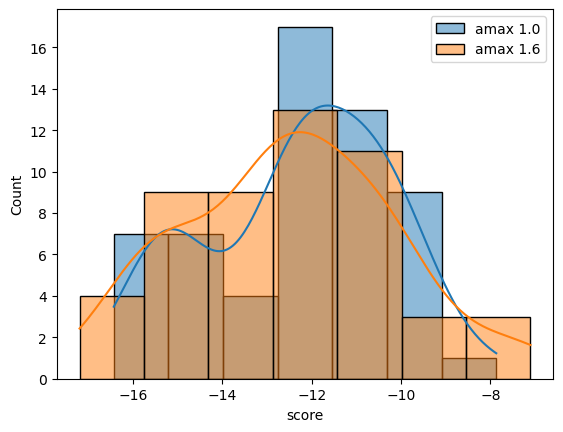

In [113]:

fig,ax = plt.subplots()
sns.histplot(amax1_0_dist.score, ax=ax, label='amax 1.0', kde=True)
sns.histplot(amax1_6_dist.score, ax=ax, label='amax 1.6', kde=True)
ax.legend()
plt.show()

In [114]:
# power analysis
from statsmodels.stats.power import TTestIndPower
# calculate the effect size
effect = (amax1_6_dist.score.mean() - amax1_0_dist.score.mean()) / amax1_0_dist.score.std()
effect = np.abs(effect)
print('Effect size: %.3f' % effect)

Effect size: 0.096


In [115]:
effect_pool = (amax1_6_dist.score.mean() - amax1_0_dist.score.mean()) / np.sqrt((amax1_0_dist.score.std()**2 + amax1_6_dist.score.std()**2)/2)
effect_pool = np.abs(effect_pool)
print('Effect size: %.3f' % effect_pool)

Effect size: 0.090


In [116]:
power_analysis = TTestIndPower()
power_analysis.solve_power(effect_size=effect, nobs1=None, alpha=0.05, power=0.8, ratio=0.89, alternative='larger')

1422.9789484144803

In [117]:
power_analysis.solve_power(effect_size=effect_pool, nobs1=None, alpha=0.05, power=0.8, ratio=0.89, alternative='larger')

1637.6194254649586

In [118]:
print(f'Amax 1,6 mean: {amax1_6_dist.score.mean()}')
print(f'Amax 1,0 mean: {amax1_0_dist.score.mean()}')

Amax 1,6 mean: -12.484615384615383
Amax 1,0 mean: -12.28793103448276


In [119]:
print(f'Amax 1,6 std: {amax1_6_dist.score.std()}')
print(f'Amax 1,0 std: {amax1_0_dist.score.std()}')

Amax 1,6 std: 2.335698722051798
Amax 1,0 std: 2.047103200068212


In [120]:
print(f'Amax 1,6 median: {amax1_6_dist.score.median()}')
print(f'Amax 1,0 median: {amax1_0_dist.score.median()}')

Amax 1,6 median: -12.283333333333335
Amax 1,0 median: -12.016666666666666


In [121]:
import json
with open('./GA_results/2023-03-24_14-25-42_args_50_100_seed_2023_no_duplicates_rank_amax1_6_lig_v4.json', 'r') as f:
    data = json.load(f)
    print(len(data['docked_compounds']))
    print(len(set(data['docked_compounds'])))
    amax1_6_all_docked = data['docked_compounds']

3028
3028


In [122]:
with open('./GA_results/2023-03-24_02-41-37_args_50_100_seed_4_no_duplicates_rank_amax1_0_lig_v4.json', 'r') as f:
    data = json.load(f)
    print(len(data['docked_compounds']))
    print(len(set(data['docked_compounds'])))
    amax1_0_all_docked = data['docked_compounds']

3414
3414


In [123]:
ratio = len(amax1_6_all_docked) / len(amax1_0_all_docked)
print(f'Ratio of docked compounds: {ratio:.2f}')

Ratio of docked compounds: 0.89


In [124]:
print(amax1_6_all_docked)

['1_2_5651', '6_2_4662', '3_3_2515', '6_2_8655', '3_3_8026', '1_0_1088', '1_6_3669', '2_1_2875', '1_4_2890', '0_2_4156', '1_2_9439', '0_1_3049', '3_3_6537', '0_1_1696', '1_1_4027', '6_1_5484', '0_3_3562', '0_3_4512', '1_2_7518', '1_0_4391', '6_1_5973', '4_5_2692', '3_0_7316', '5_5_3065', '0_1_2592', '0_0_2644', '5_2_4494', '0_0_1566', '6_3_5159', '0_3_7174', '0_3_2050', '2_0_2791', '0_1_692', '2_0_2933', '1_5_5219', '0_5_8512', '0_3_5917', '0_2_1815', '6_1_225', '6_1_6774', '5_2_4773', '5_6_5513', '4_0_7240', '2_0_6233', '5_5_5598', '0_0_7181', '0_5_2914', '6_3_1661', '4_1_1661', '0_2_9285', '3_5_7316', '0_2_3828', '6_3_5982', '0_3_9122', '5_3_1025', '0_5_3657', '0_1_2924', '5_2_8026', '3_2_3708', '0_1_1781', '0_3_2855', '4_0_8928', '1_5_7940', '2_6_8466', '6_2_442', '5_1_7548', '2_4_7342', '0_5_2919', '1_0_6123', '3_1_8131', '2_5_1817', '5_0_4223', '5_0_3515', '0_3_7817', '0_1_4379', '6_3_1951', '0_2_7240', '5_1_2254', '0_5_1520', '0_1_6521', '5_2_720', '0_2_5651', '6_2_7549', '4_2_73

In [125]:
amax1_6_all_docked = history[history.id.isin(amax1_6_all_docked)]
amax1_0_all_docked = history[history.id.isin(amax1_0_all_docked)]

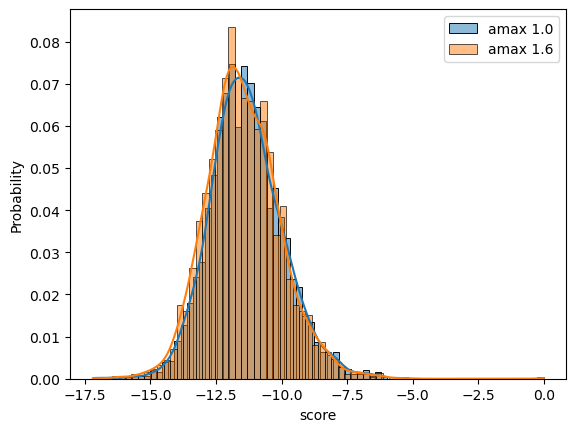

In [126]:
fig,ax = plt.subplots()
sns.histplot(amax1_0_all_docked.score, ax=ax, label='amax 1.0', kde=True, stat='probability')
sns.histplot(amax1_6_all_docked.score, ax=ax, label='amax 1.6', kde=True, stat='probability')
ax.legend()
plt.show()

In [127]:
from scipy.stats import ttest_ind

In [128]:
last_gen_test = ttest_ind(amax1_6_dist.score, amax1_0_dist.score, equal_var=False, alternative='less')

In [129]:
print(f'p-value for last generation: {last_gen_test[1]:.5f}')

p-value for last generation: 0.32065


In [130]:
all_docked_test = ttest_ind(amax1_6_all_docked.score, amax1_0_all_docked.score, equal_var=False, alternative='less')

In [131]:
print(f'p-value for all docked: {all_docked_test[1]:.5f}')

p-value for all docked: 0.00028


In [132]:
# calcuate z-score
from statsmodels.stats.weightstats import ztest

In [133]:
print(f'p-value for last generation: {ztest(amax1_6_dist.score, amax1_0_dist.score, alternative="smaller")[1]:.5f}')

p-value for last generation: 0.31894


In [134]:
print(f'p-value for all docked: {ztest(amax1_6_all_docked.score, amax1_0_all_docked.score, alternative="smaller")[1]:.5f}')

p-value for all docked: 0.00027


In [135]:
# all docked mean
print(f'Amax 1,6 mean: {amax1_6_all_docked.score.mean()}, median: {amax1_6_all_docked.score.median()}, std: {amax1_6_all_docked.score.std()}')
print(f'Amax 1,0 mean: {amax1_0_all_docked.score.mean()}, median: {amax1_0_all_docked.score.median()}, std: {amax1_0_all_docked.score.std()}')


Amax 1,6 mean: -11.459467654986522, median: -11.566666666666668, std: 1.4144206986681123
Amax 1,0 mean: -11.338029850746269, median: -11.433333333333332, std: 1.3761327147370446


In [136]:
# random sample from history with replacement
history_sample = history.sample(n=3000, replace=True)

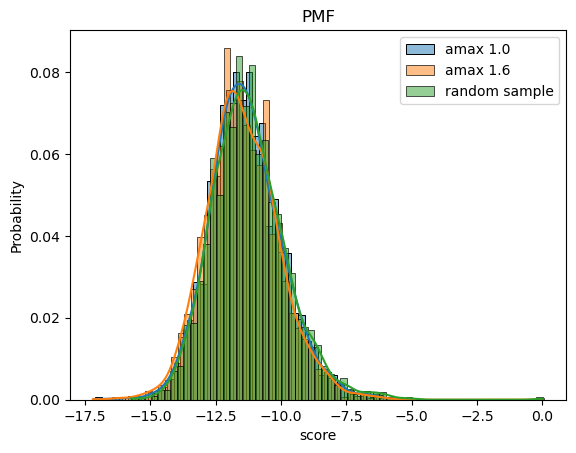

In [137]:
fig,ax = plt.subplots()
sns.histplot(amax1_0_all_docked.score, ax=ax, label='amax 1.0', kde=True, stat='probability', binwidth=0.25)
sns.histplot(amax1_6_all_docked.score, ax=ax, label='amax 1.6', kde=True, stat='probability', binwidth=0.25)
sns.histplot(history_sample.score, ax=ax, label='random sample', kde=True, stat='probability', binwidth=0.25)
plt.title('PMF')
ax.legend()
plt.show()

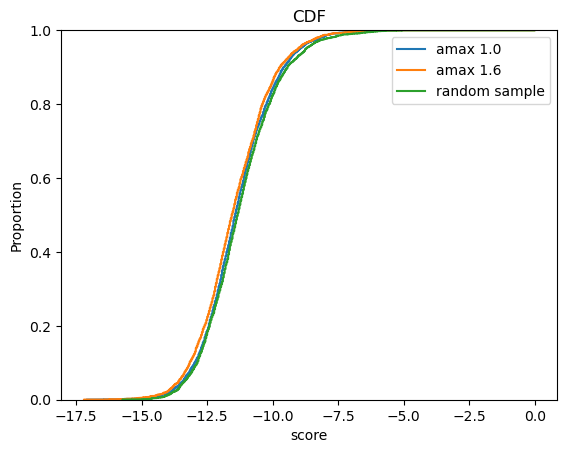

In [138]:
# plot smoothed CDF
fig,ax = plt.subplots()
sns.ecdfplot(amax1_0_all_docked.score, ax=ax, label='amax 1.0', stat='proportion')
sns.ecdfplot(amax1_6_all_docked.score, ax=ax, label='amax 1.6', stat='proportion')
sns.ecdfplot(history_sample.score, ax=ax, label='random sample', stat='proportion')
plt.title('CDF')
ax.legend()
plt.show()

In [139]:
print(f'p-value for random sample vs amax 1.0: {ttest_ind(history_sample.score, amax1_0_all_docked.score, equal_var=False)[1]:.5f}')
print(f'p-value for random sample vs amax 1.6: {ttest_ind(history_sample.score, amax1_6_all_docked.score, equal_var=False)[1]:.5f}')
print(f'p-value for amax 1.6 vs amax 1.0: {ttest_ind(amax1_6_all_docked.score, amax1_0_all_docked.score, equal_var=False)[1]:.5f}')

p-value for random sample vs amax 1.0: 0.00112
p-value for random sample vs amax 1.6: 0.00000
p-value for amax 1.6 vs amax 1.0: 0.00057


### Bigger test

In [140]:
big_results1_6_path = './GA_results/2023-04-20_08-05-15_best_score_pop2000_gen10_seed2023_nodup_selrank_amax1.6__lig_v4.csv'
big_results1_0 = './GA_results/2023-04-20_22-42-17_best_score_pop2000_gen10_seed2023_nodup_selrank_amax1.0__lig_v4.csv'

In [141]:
big_results1_6 = pd.read_csv(big_results1_6_path)
big_results1_0 = pd.read_csv(big_results1_0)

In [142]:
big_results1_6_compounds = big_results1_6[big_results1_6.gen == 9]['compound'].values
# split the compounds on space
big_results1_6_compounds = [x.split() for x in big_results1_6_compounds][0]

In [143]:
big_results1_0_compounds = big_results1_0[big_results1_0.gen == 9]['compound'].values
# split the compounds
big_results1_0_compounds = [x.split() for x in big_results1_0_compounds][0]

In [144]:
big_amx1_6_dist = history[history.id.isin(big_results1_6_compounds)]
big_amx1_0_dist = history[history.id.isin(big_results1_0_compounds)]

In [145]:
random_2000 = history.sample(n=2000, replace=True)

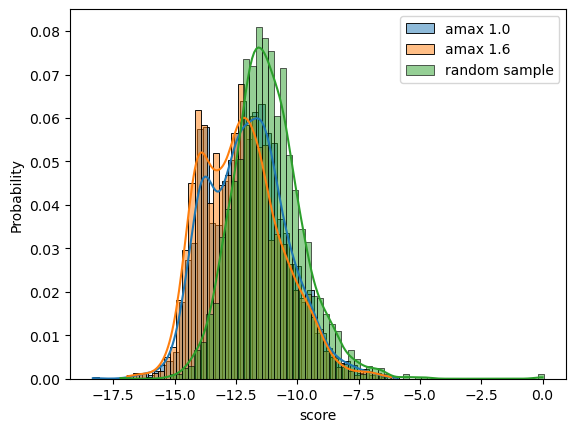

In [146]:
fig,ax = plt.subplots()
sns.histplot(big_amx1_0_dist.score, ax=ax, label='amax 1.0', kde=True, stat='probability', binwidth=0.25)
sns.histplot(big_amx1_6_dist.score, ax=ax, label='amax 1.6', kde=True, stat='probability', binwidth=0.25)
sns.histplot(random_2000.score, ax=ax, label='random sample', kde=True, stat='probability', binwidth=0.25)
ax.legend()
plt.show()

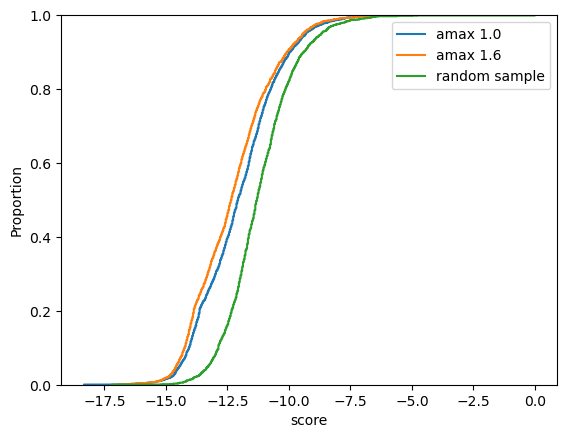

In [147]:
#cdf
fig,ax = plt.subplots()
sns.ecdfplot(big_amx1_0_dist.score, ax=ax, label='amax 1.0', stat='proportion')
sns.ecdfplot(big_amx1_6_dist.score, ax=ax, label='amax 1.6', stat='proportion')
sns.ecdfplot(random_2000.score, ax=ax, label='random sample', stat='proportion')
ax.legend()
plt.show()

In [148]:
def get_pvalue(sample, population):
    return ttest_ind(sample, population, equal_var=False, alternative='less')[1]

In [149]:
print(f'p-value for random sample vs amax 1.0: {get_pvalue(big_amx1_0_dist.score, random_2000.score):.5f}')
print(f'p-value for random sample vs amax 1.6: {get_pvalue(big_amx1_6_dist.score, random_2000.score):.5f}')
print(f'p-value for amax 1.0 vs amax 1.6: {get_pvalue(big_amx1_6_dist.score, big_amx1_0_dist.score):.5f}')

p-value for random sample vs amax 1.0: 0.00000
p-value for random sample vs amax 1.6: 0.00000
p-value for amax 1.0 vs amax 1.6: 0.00000


### Fragemnts dist

In [170]:
amax16_654 = './GA_results/2023-03-30_03-07-24_genes_overview_pop50_gen100_seed654_nodup_selrank_amax1.6__lig_v4.csv'
amax16_2023 = './GA_results/2023-03-24_14-25-41_genes_overview_50_100_seed_2023_no_duplicates_rank_amax1_6_lig_v4.csv'
amax16_4 = './GA_results/2023-03-23_11-08-53_genes_overview_50_100_seed_4_no_duplicates_rank_amax1_6_lig_v4.csv'
amax16_384 = './GA_results/2023-05-12_05-29-00_genes_overview_pop50_gen100_seed384_nodup_selrank_amax1.6__lig_v4.csv'
amax16_3484 = './GA_results/2023-05-12_06-00-52_genes_overview_pop50_gen100_seed3484_nodup_selrank_amax1.6__lig_v4.csv'

In [154]:
df_1 = pd.read_csv(amax16_654)
df_2 = pd.read_csv(amax16_2023)
df_3 = pd.read_csv(amax16_4)
df_4 = pd.read_csv(amax16_384)
df_5 = pd.read_csv(amax16_3484)

In [155]:
df_1.head()

,Unnamed: 0,ps,link,lig,gen
0,0,5,4,6290,0
1,1,5,2,1631,0
2,2,4,3,8025,0
3,3,2,5,2595,0
4,4,6,3,4633,0


In [158]:
def plot_part(dfs,part):
    fig, ax = plt.subplots(len(dfs), 1, figsize=(10, 10))
    plt.subplots_adjust(hspace=0.5)
    for df, ax in zip(dfs, ax):
        sns.countplot(x=part, data=df, ax=ax, hue='gen')

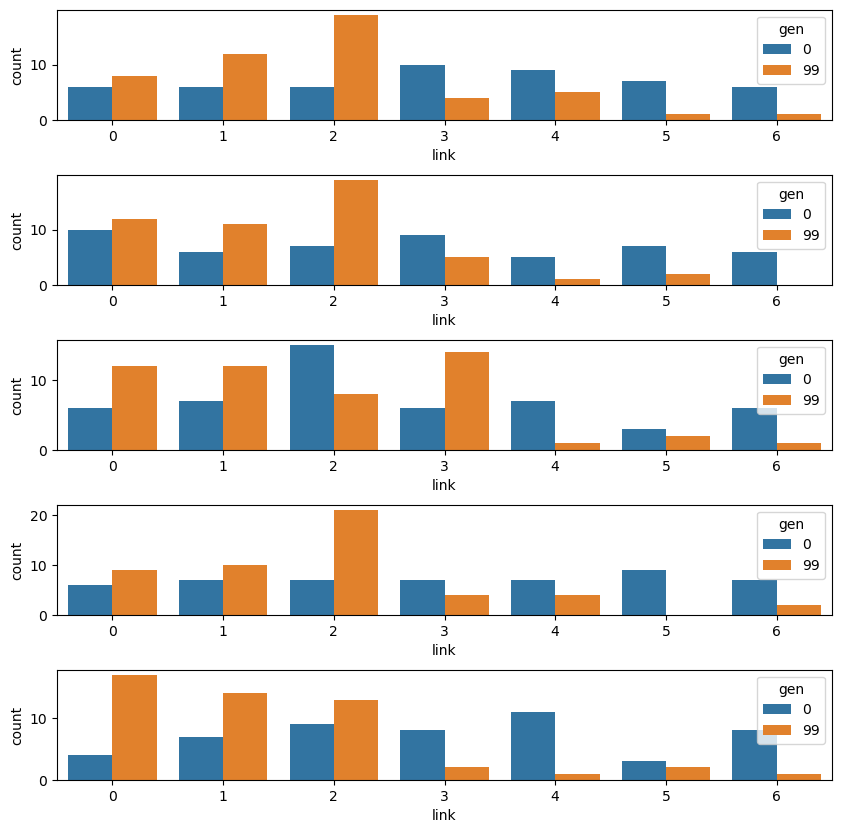

In [160]:
plot_part((df_1, df_2, df_3, df_4, df_5), 'link')

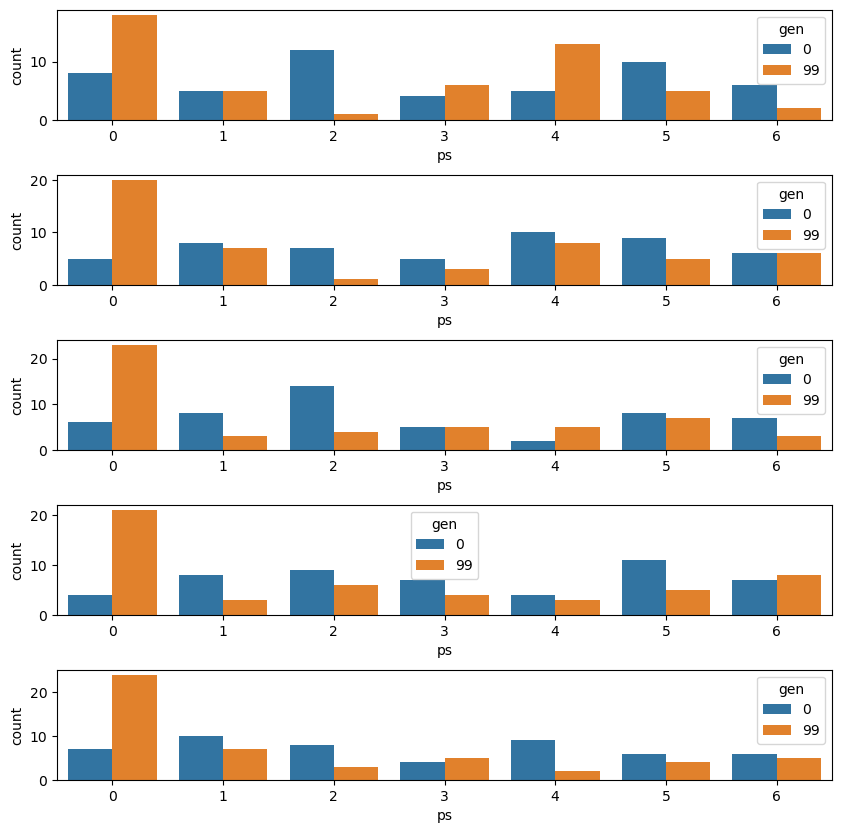

In [161]:
plot_part((df_1, df_2, df_3, df_4, df_5), 'ps')

In [162]:
dfs = (df_1, df_2, df_3, df_4, df_5)
# add column with number of experiment
for i, df in enumerate(dfs):
    df['exp'] = i


In [163]:
all_merged = pd.concat((df_1, df_2, df_3, df_4, df_5))
all_merged.drop('Unnamed: 0', axis=1, inplace=True)
all_merged.head()

,ps,link,lig,gen,exp
0,5,4,6290,0,0
1,5,2,1631,0,0
2,4,3,8025,0,0
3,2,5,2595,0,0
4,6,3,4633,0,0


In [164]:
all_merged.groupby(['exp', 'gen'])['ps'].value_counts()

exp  gen  ps
0    0    2     12
          5     10
          0      8
          6      6
          1      5
                ..
4    99   3      5
          6      5
          5      4
          2      3
          4      2
Name: ps, Length: 70, dtype: int64

In [165]:
ps_counts_df = all_merged.groupby(['exp', 'gen'])['ps'].value_counts().to_frame()
ps_counts_df.columns = ['count']
ps_counts_df.reset_index(inplace=True)
ps_counts_df.head()

,exp,gen,ps,count
0,0,0,2,12
1,0,0,5,10
2,0,0,0,8
3,0,0,6,6
4,0,0,1,5


Text(0.5, 1.0, 'Photosensitizer distribution in first and last generation')

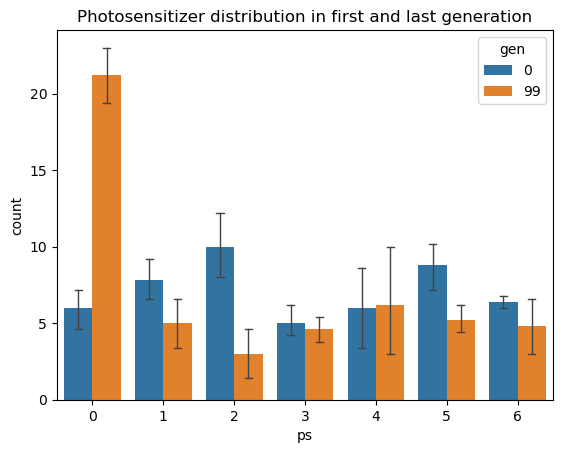

In [257]:
sns.barplot(x='ps', y='count', data=ps_counts_df, hue='gen', capsize=0.1, errwidth=1)
plt.title('Photosensitizer distribution in first and last generation')

Text(0.5, 1.0, 'Linker distribution in first and last generation')

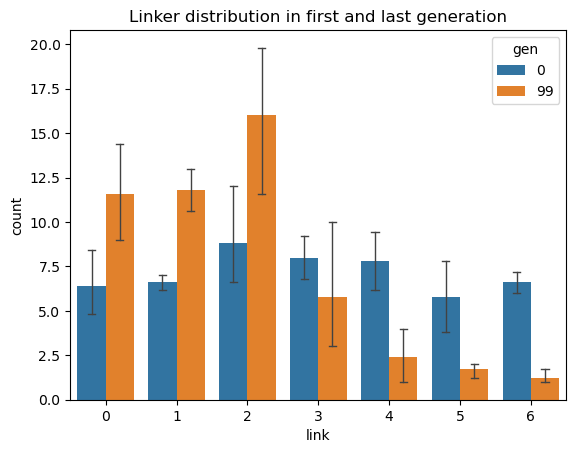

In [167]:
link_counts_df = all_merged.groupby(['exp', 'gen'])['link'].value_counts().to_frame()
link_counts_df.columns = ['count']
link_counts_df.reset_index(inplace=True)
link_counts_df.head()
sns.barplot(x='link', y='count', data=link_counts_df, hue='gen', capsize=0.1, errwidth=1)
plt.title('Linker distribution in first and last generation')

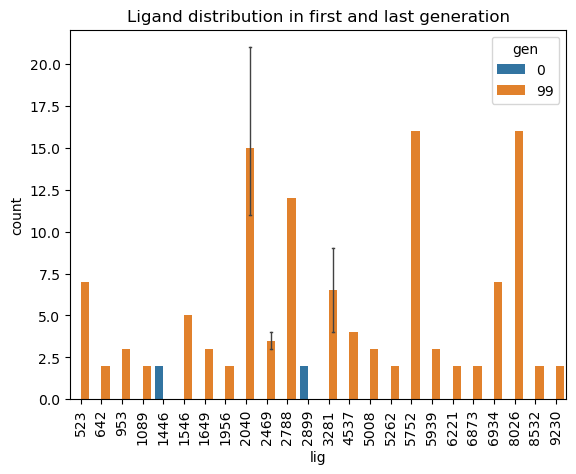

In [168]:
lig_counts_df = all_merged.groupby(['exp', 'gen'])['lig'].value_counts().to_frame()
lig_counts_df.columns = ['count']
lig_counts_df.reset_index(inplace=True)
lig_counts_df.head()
lig_selected = lig_counts_df[lig_counts_df['count'] > 1]
sns.barplot(x='lig', y='count', data=lig_selected, hue='gen', capsize=0.1, errwidth=1)
plt.xticks(rotation=90)
plt.title('Ligand distribution in first and last generation')
plt.show()

In [169]:
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True

with open('../data/parts/linker.smi') as f:
    linkers = [Chem.MolFromSmiles(line) for line in f.readlines()]
names = [f'linker {i}' for i in range(len(linkers))]

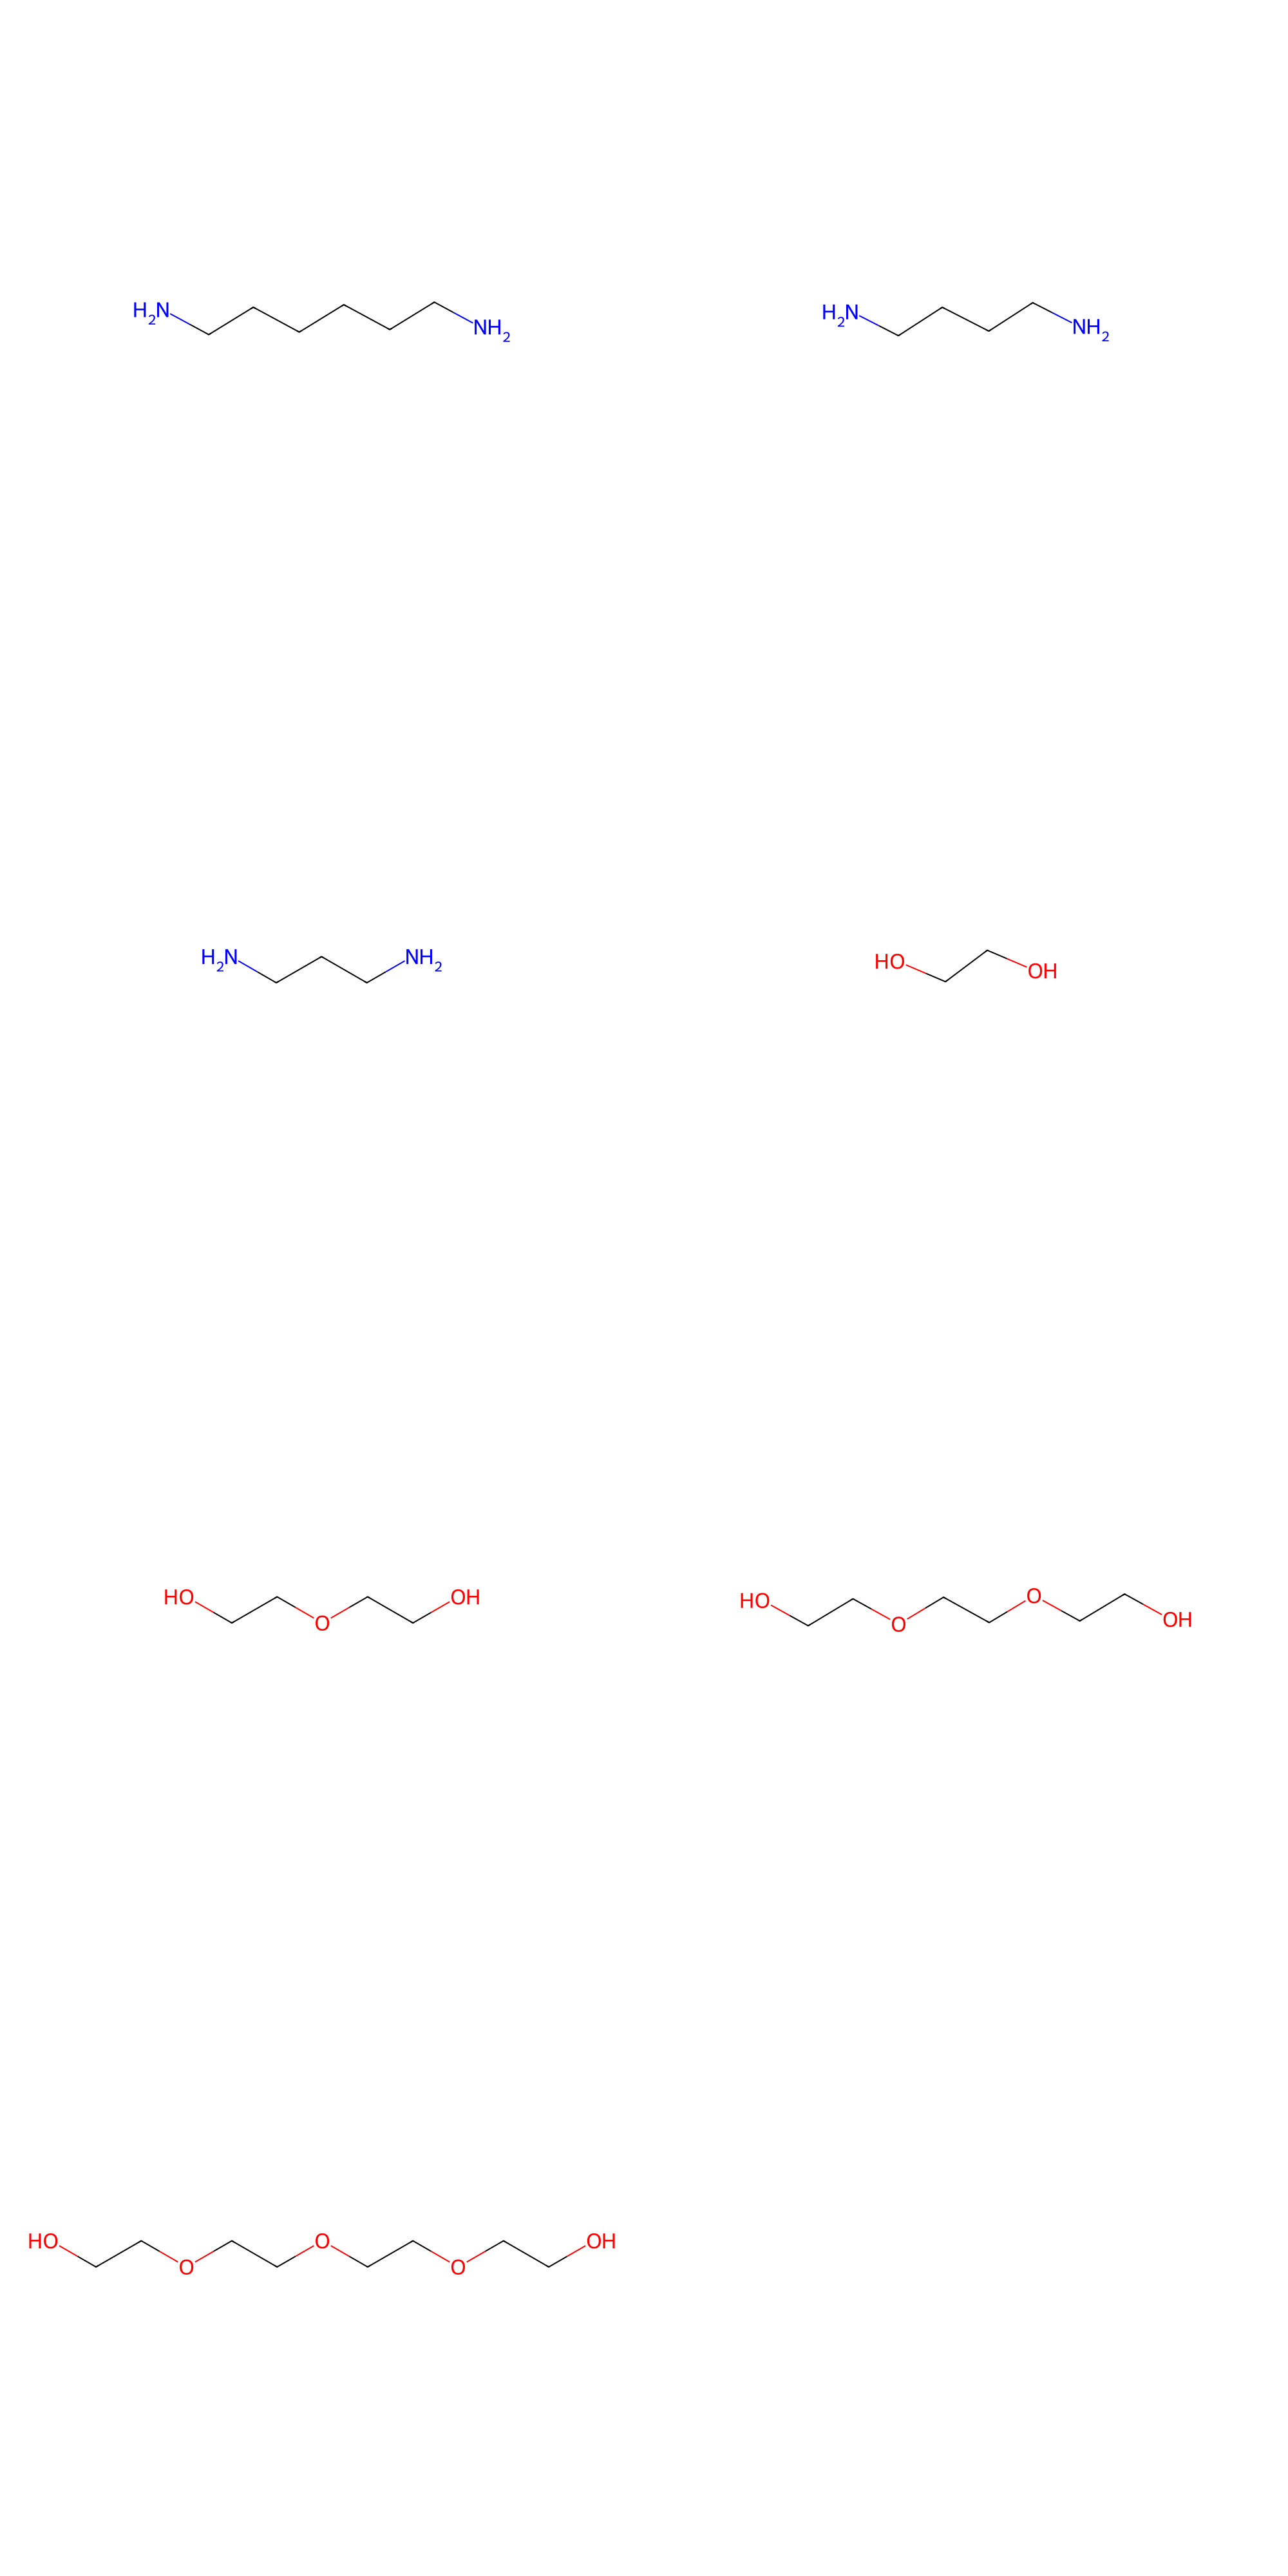

In [103]:
# fraw all linkers on one figure
img = Draw.MolsToGridImage(linkers, molsPerRow=2, subImgSize=(1000, 1000), useSVG=False)
img

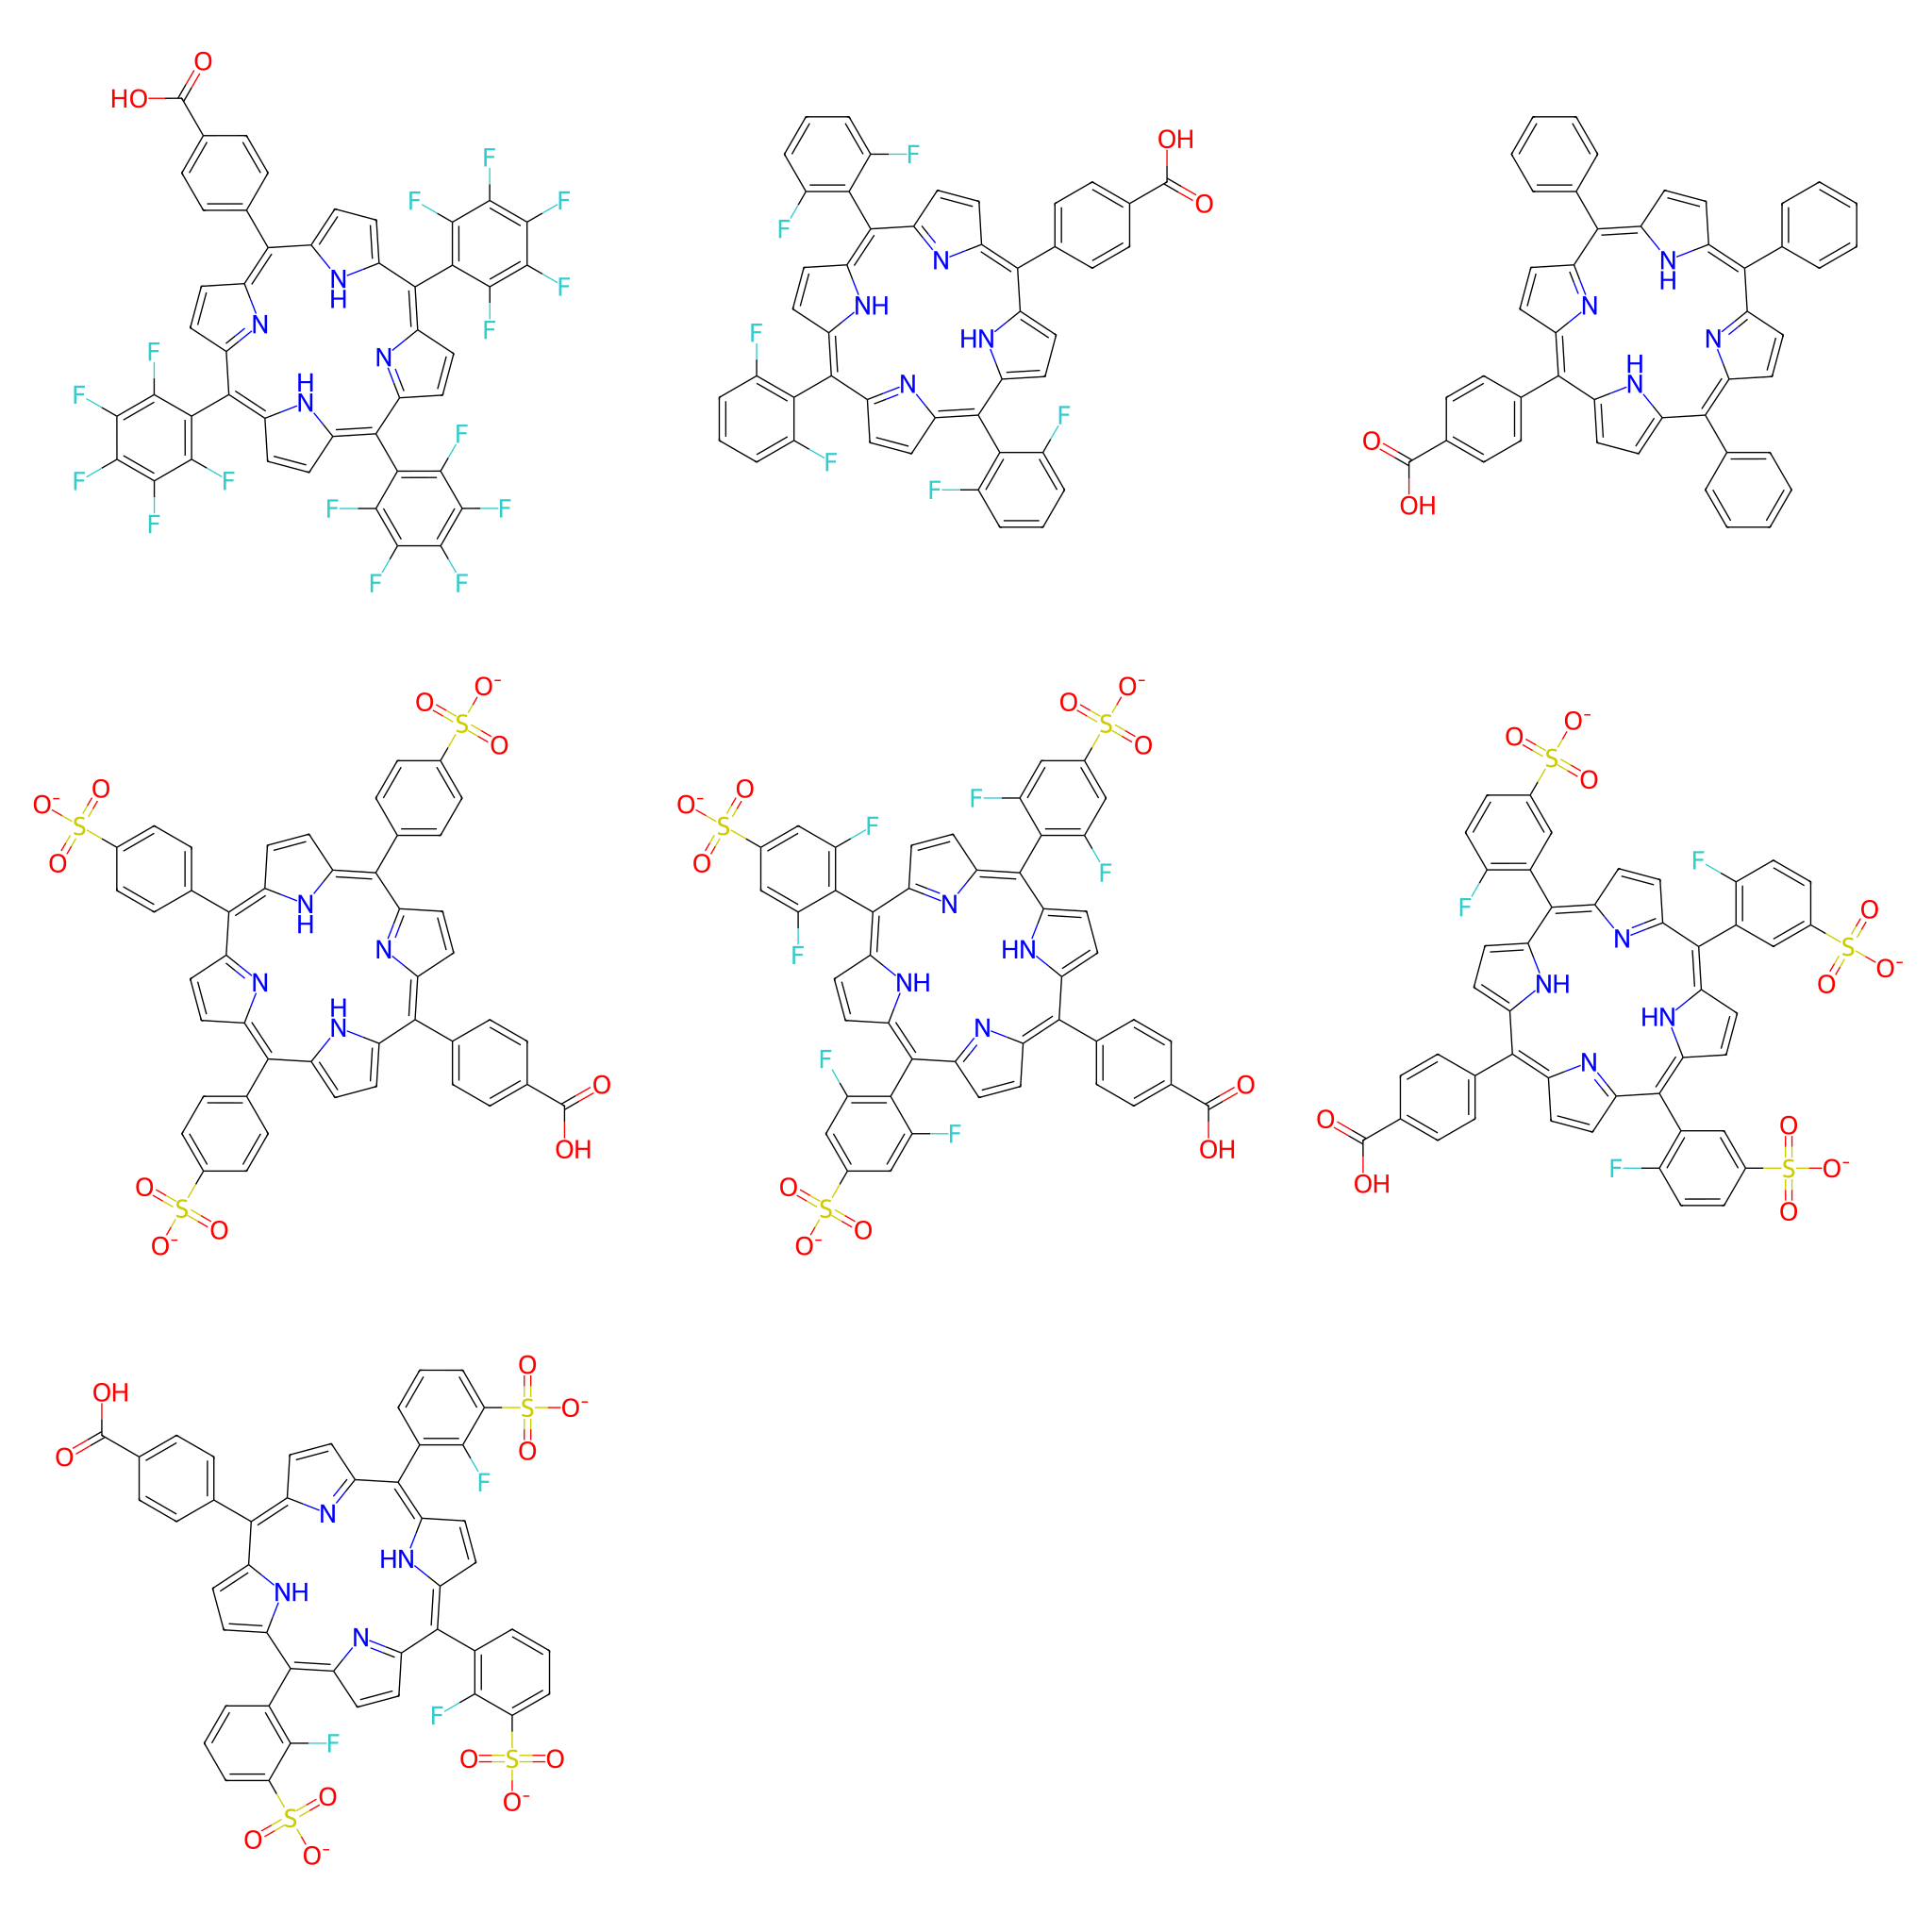

In [88]:
from rdkit.Chem import rdCoordGen
from rdkit.Chem.Draw import rdMolDraw2D
with open('../data/parts/ps.smi') as f:
    ps = [Chem.MolFromSmiles(line) for line in f.readlines()]
names = [f'\nFotosensenilizator {i}\n' for i in range(len(ps))]
for mol in ps:
    rdCoordGen.AddCoords(mol)
# draw molecules
Draw.MolsToGridImage(ps, molsPerRow=3, subImgSize=(1000, 1000), useSVG=True)

### Rank or roulette

In [182]:
roul = !ls GA_results | grep best_score.*selroulette__lig_v4.csv
rank = !ls GA_results | grep best_score_pop50.*selrank_amax1.6.*.csv
assert len(roul) == len(rank)

In [183]:
roul_dfs = [pd.read_csv(os.path.join('GA_results', x)) for x in roul]
rank_dfs = [pd.read_csv(os.path.join('GA_results', x)) for x in rank]

In [184]:
roul_dfs[0].head()

,gen,mean_score,compound,best_5_score,best_10_score,best_20_score
0,0,-10.543333,1_2_1690 5_3_7845 1_0_1089 0_3_9001 2_6_964 1_...,-12.760000,-12.556667,-12.263333
1,1,-11.276437,6_0_2674 5_1_3821 2_6_6986 6_2_3169 2_1_6724 3...,-13.226667,-12.973333,-12.701667
2,2,-11.461494,0_5_3169 4_1_7580 6_2_4745 5_2_2376 1_6_7062 0...,-13.406667,-13.203333,-12.915000
3,3,-11.488304,6_2_7103 5_0_2733 0_3_4734 0_2_239 1_1_3169 4_...,-13.553333,-13.363333,-13.101667
4,4,-11.455932,4_2_3169 6_2_2854 5_0_1273 0_1_5654 1_1_1026 3...,-13.573333,-13.420000,-13.123333


In [191]:
roul_jsons = !ls GA_results | grep args.*selroulette__lig_v4.json
rank_jsons = !ls GA_results | grep args_pop50.*selrank_amax1.6.*.json
assert len(roul_jsons) == len(rank_jsons)

In [194]:
def read_params(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
        assert len(data['docked_compounds']) == len(set(data['docked_compounds']))
        return data['docked_compounds']

In [208]:
all_roul_compounds = [read_params(os.path.join('GA_results', x)) for x in roul_jsons]
all_rank_compounds = [read_params(os.path.join('GA_results', x)) for x in rank_jsons]
all_roul_compounds = [item for sublist in all_roul_compounds for item in sublist]
all_rank_compounds = [item for sublist in all_rank_compounds for item in sublist]

In [209]:
len(all_roul_compounds), len(all_rank_compounds)

(16130, 14908)

In [210]:
all_roul_compounds = history[history.id.isin(all_roul_compounds)]
all_rank_compounds = history[history.id.isin(all_rank_compounds)]

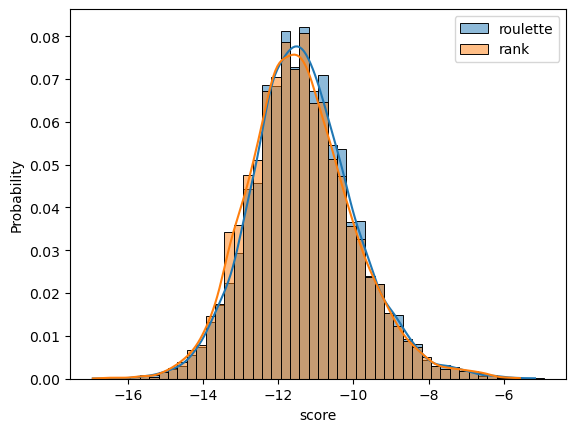

In [213]:
fig, ax = plt.subplots()
sns.histplot(all_roul_compounds.score, ax=ax, label='roulette', kde=True, stat='probability', binwidth=0.25)
sns.histplot(all_rank_compounds.score, ax=ax, label='rank', kde=True, stat='probability', binwidth=0.25)
ax.legend()
plt.show()

In [218]:
p_selection = ttest_ind(all_rank_compounds.score, all_roul_compounds.score, equal_var=False, alternative='less')
print(f'p-value for selection: {p_selection[1]:.5f}')
#effect size with pooled std\
effect_pool = (all_rank_compounds.score.mean() - all_roul_compounds.score.mean()) / np.sqrt((all_rank_compounds.score.std()**2 + all_roul_compounds.score.std()**2)/2)
effect_pool = np.abs(effect_pool)
print(f'Effect size: {effect_pool:.3f}')

p-value for selection: 0.00000
Effect size: 0.063


In [219]:
print(f'Mean rank: {all_rank_compounds.score.mean()}, std: {all_rank_compounds.score.std()}')
print(f'Mean roul: {all_roul_compounds.score.mean()}, std: {all_roul_compounds.score.std()}')

Mean rank: -11.412972580947033, std: 1.4040267208641053
Mean roul: -11.324912076294043, std: 1.3789173219687552


In [220]:
roul_scores_dfs  = [pd.read_csv(os.path.join('GA_results', x)) for x in roul]
rank_scores_dfs  = [pd.read_csv(os.path.join('GA_results', x)) for x in rank]

In [221]:
roul_scores_dfs[0].head()

,gen,mean_score,compound,best_5_score,best_10_score,best_20_score
0,0,-10.543333,1_2_1690 5_3_7845 1_0_1089 0_3_9001 2_6_964 1_...,-12.760000,-12.556667,-12.263333
1,1,-11.276437,6_0_2674 5_1_3821 2_6_6986 6_2_3169 2_1_6724 3...,-13.226667,-12.973333,-12.701667
2,2,-11.461494,0_5_3169 4_1_7580 6_2_4745 5_2_2376 1_6_7062 0...,-13.406667,-13.203333,-12.915000
3,3,-11.488304,6_2_7103 5_0_2733 0_3_4734 0_2_239 1_1_3169 4_...,-13.553333,-13.363333,-13.101667
4,4,-11.455932,4_2_3169 6_2_2854 5_0_1273 0_1_5654 1_1_1026 3...,-13.573333,-13.420000,-13.123333


In [233]:
all_roul_scores = pd.concat(roul_scores_dfs)
all_rank_scores = pd.concat(rank_scores_dfs)

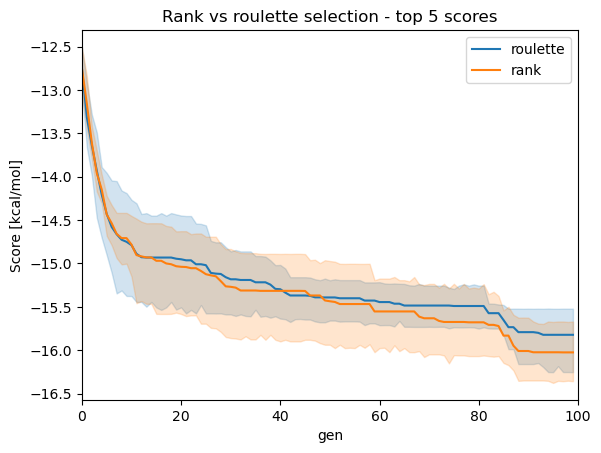

In [254]:
fig, ax = plt.subplots()
sns.lineplot(x='gen', y='best_5_score', data=all_roul_scores, ax=ax, label='roulette')
sns.lineplot(x='gen', y='best_5_score', data=all_rank_scores, ax=ax, label='rank')
ax.legend()
ax.set_xlim(0, 100)
ax.set_ylabel('Score [kcal/mol]')
plt.title('Rank vs roulette selection - top 5 scores')
plt.show()

In [250]:
#pvalue for best 5 scores
p_top5 = ttest_ind(all_rank_scores.best_5_score, all_roul_scores.best_5_score, equal_var=False, alternative='less')
print(f'p-value for top 5 scores: {p_top5[1]:.5f}')

p-value for top 5 scores: 0.02656


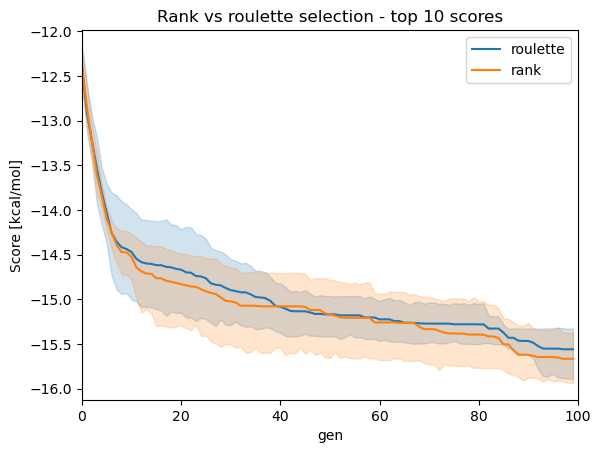

In [255]:
fig, ax = plt.subplots()
sns.lineplot(x='gen', y='best_10_score', data=all_roul_scores, ax=ax, label='roulette')
sns.lineplot(x='gen', y='best_10_score', data=all_rank_scores, ax=ax, label='rank')
ax.legend()
ax.set_ylabel('Score [kcal/mol]')
ax.set_xlim(0, 100)
plt.title('Rank vs roulette selection - top 10 scores')
plt.show()

In [251]:
p_top10 = ttest_ind(all_rank_scores.best_10_score, all_roul_scores.best_10_score, equal_var=False, alternative='less')
print(f'p-value for top 10 scores: {p_top10[1]:.5f}')

p-value for top 10 scores: 0.04687


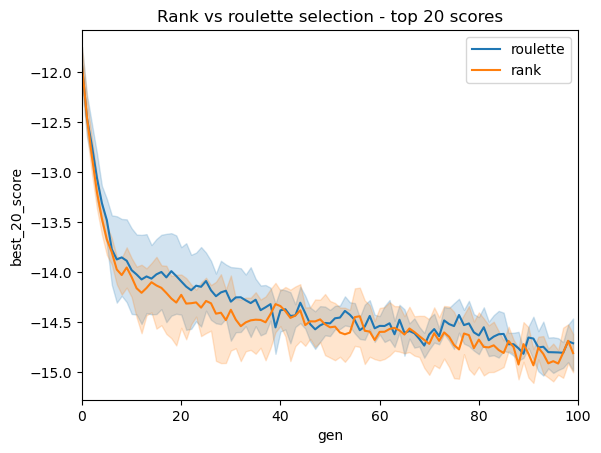

In [247]:
fig, ax = plt.subplots()
sns.lineplot(x='gen', y='best_20_score', data=all_roul_scores, ax=ax, label='roulette')
sns.lineplot(x='gen', y='best_20_score', data=all_rank_scores, ax=ax, label='rank')
ax.legend()
ax.set_xlim(0, 100)
plt.title('Rank vs roulette selection - top 20 scores')
plt.show()

In [252]:
p_top20 = ttest_ind(all_rank_scores.best_20_score, all_roul_scores.best_20_score, equal_var=False, alternative='less')
print(f'p-value for top 20 scores: {p_top20[1]:.5f}')

p-value for top 20 scores: 0.00315


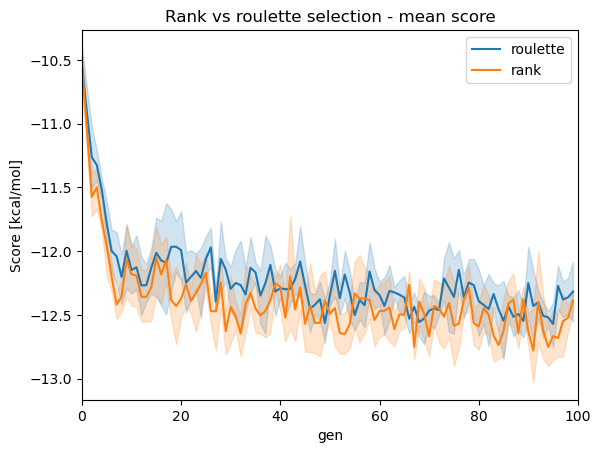

In [256]:
#for mean_score
fig, ax = plt.subplots()
sns.lineplot(x='gen', y='mean_score', data=all_roul_scores, ax=ax, label='roulette')
sns.lineplot(x='gen', y='mean_score', data=all_rank_scores, ax=ax, label='rank')
ax.legend()
ax.set_ylabel('Score [kcal/mol]')
ax.set_xlim(0, 100)
plt.title('Rank vs roulette selection - mean score')
plt.show()


In [253]:
p_mean = ttest_ind(all_rank_scores.mean_score, all_roul_scores.mean_score, equal_var=False, alternative='less')
print(f'p-value for mean score: {p_mean[1]:.5f}')

p-value for mean score: 0.00000
